## Just some basic EDA on the data from ratingraph, not including the genres yet. (this first part was before i found the outliers for number of episodes per season.)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [3]:
# Load data
tv_show_df = pd.read_pickle('clean_tv_show_df.pkl')

# Take a look at the datatypes
tv_show_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Title                    1000 non-null   object 
 1   Start_Year               1000 non-null   int64  
 2   End_Year                 1000 non-null   int64  
 3   Genres                   1000 non-null   object 
 4   Num_of_Seasons           1000 non-null   int64  
 5   Num_of_Episodes          1000 non-null   int64  
 6   Num_Episodes_Per_Season  1000 non-null   float64
 7   Season_1_Rating          1000 non-null   float64
 8   Years_Ran                1000 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 70.4+ KB


In [4]:
# Load a copy in case i mess up
copy_tv_show_df = pd.read_pickle('clean_tv_show_df.pkl')

In [5]:
tv_show_df.head()

,Title,Start_Year,End_Year,Genres,Num_of_Seasons,Num_of_Episodes,Num_Episodes_Per_Season,Season_1_Rating,Years_Ran
0,Chernobyl,2019,2019,"[Drama, History, Thriller]",1,5,5.00,9.6,1
1,Game of Thrones,2011,2019,"[Action, Drama, Adventure]",8,73,9.12,9.1,8
2,Black Mirror,2011,0,"[Drama, Sci-fi, Thriller]",5,22,4.40,8.1,9
3,Sherlock,2010,2017,"[Drama, Crime, Mystery]",4,12,3.00,8.8,7
4,Breaking Bad,2008,2013,"[Drama, Crime, Thriller]",5,62,12.40,8.8,5


In [6]:
tv_show_df.shape

(1000, 9)

In [7]:
tv_show_df.corr()

,Start_Year,End_Year,Num_of_Seasons,Num_of_Episodes,Num_Episodes_Per_Season,Season_1_Rating,Years_Ran
Start_Year,1.000000,-0.353229,-0.547924,-0.527568,-0.244184,-0.013036,-0.587728
End_Year,-0.353229,1.000000,0.000263,0.046137,0.094488,0.000531,-0.089885
Num_of_Seasons,-0.547924,0.000263,1.000000,0.869856,0.170843,0.014056,0.838630
Num_of_Episodes,-0.527568,0.046137,0.869856,1.000000,0.449731,0.010600,0.733839
Num_Episodes_Per_Season,-0.244184,0.094488,0.170843,0.449731,1.000000,-0.006465,0.168331
Season_1_Rating,-0.013036,0.000531,0.014056,0.010600,-0.006465,1.000000,0.018008
Years_Ran,-0.587728,-0.089885,0.838630,0.733839,0.168331,0.018008,1.000000


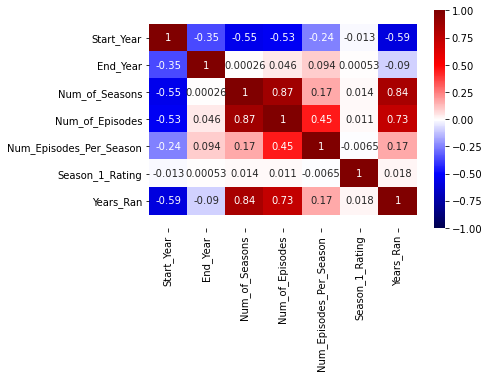

In [8]:
# try a heatmap for the corr matrix
sns.heatmap(tv_show_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

plt.gca().set_ylim(len(tv_show_df.corr())+0.5, -0.5);  # quick fix to make sure viz isn't cut off


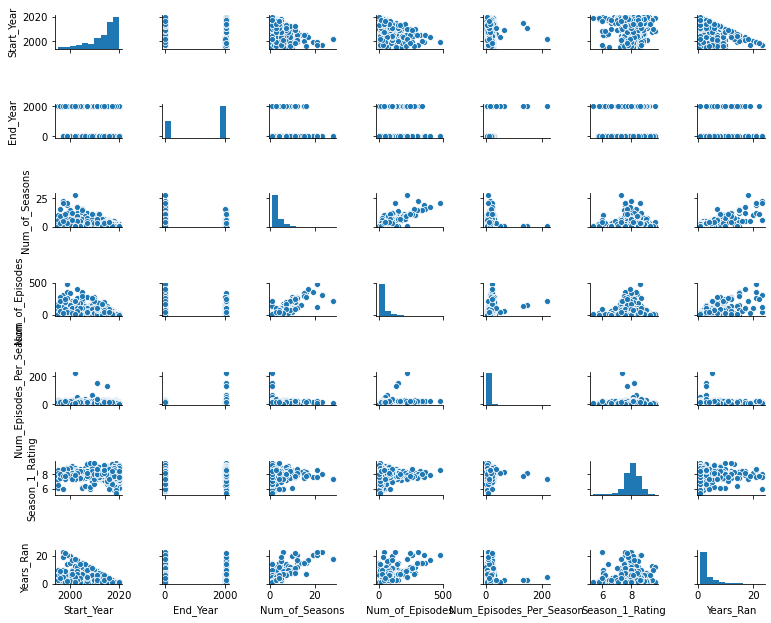

In [9]:
# Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(tv_show_df, height=1.2, aspect=1.25);

In [10]:
tv_show_df.describe()

,Start_Year,End_Year,Num_of_Seasons,Num_of_Episodes,Num_Episodes_Per_Season,Season_1_Rating,Years_Ran
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2013.604000,1311.64500,3.036000,40.877000,11.716910,8.057400,3.290000
std,5.835858,960.85876,2.933481,55.961483,10.594048,0.532493,3.429528
min,1995.000000,0.00000,1.000000,2.000000,1.000000,5.400000,1.000000
25%,2011.000000,0.00000,1.000000,10.000000,8.000000,7.800000,1.000000
50%,2015.000000,2012.00000,2.000000,20.000000,10.000000,8.100000,2.000000
75%,2018.000000,2017.00000,4.000000,46.250000,13.000000,8.400000,4.000000
max,2020.000000,2021.00000,28.000000,478.000000,220.000000,9.600000,23.000000


## Start with just the basic linear regression model

In [27]:
# Create an empty model
lr = LinearRegression()

# Choose just the X1 column for our data
X = tv_show_df[['Start_Year', 'Num_Episodes_Per_Season', 'Season_1_Rating']]
#X = tv_show_df['Season_1_Rating'].values.reshape(-1,1)

# Choose the response variable
y = tv_show_df['Num_of_Seasons']

# Fit the model 
lr.fit(X, y)

LinearRegression()

In [28]:
lr.score(X, y) #R^2 = .30... pretty bad

0.3017339054020156

In [30]:
# print out intercept
print(lr.intercept_)

# print out other coefficients
print(lr.coef_)


547.3235983289507
[-0.27052959  0.0109298   0.04018703]


## Try to model it using statsmodels

In [32]:
#add a constant since statsmodels.api does not add one by default
# Add a column of ones with sm.add_constant()
sm.add_constant(X).head()

,const,Start_Year,Num_Episodes_Per_Season,Season_1_Rating
0,1.0,2019,5.00,9.6
1,1.0,2011,9.12,9.1
2,1.0,2011,4.40,8.1
3,1.0,2010,3.00,8.8
4,1.0,2008,12.40,8.8


In [33]:
#Create the model
model = sm.OLS(y, sm.add_constant(X)) 

#Fit
fit = model.fit()

#Print out summary
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Num_of_Seasons   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     143.5
Date:                Mon, 05 Oct 2020   Prob (F-statistic):           2.92e-77
Time:                        17:11:46   Log-Likelihood:                -2315.1
No. Observations:                1000   AIC:                             4638.
Df Residuals:                     996   BIC:                             4658.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     547.3236     27.704     19.756      0.000     492.958     601.689
Start_Year                 -0.2705      0.014    -19.709      0.000      -0.297      -0.244
Num_Episodes_Per_Season     0.0109      0.008      1.446      0.149      -0.004       0.026
Season_1_Rating             0.0402      0.146      0.275      0.783      -0.246       0.326
==============================================================================
Omnibus:                      491.896   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6201.447
Skew:                           1.932   Prob(JB):                         0.00
Kurtosis:                      14.572   Cond. No.                     7.19e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

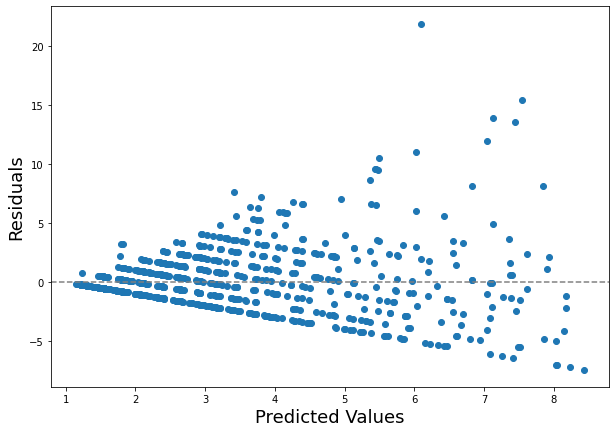

In [34]:
# Use statsmodels to plot the residuals vs the fitted values
plt.figure(figsize=(10, 7))
plt.scatter(fit.predict(), fit.resid)    #change this if working with sklearn

plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Predicted Values', fontsize=18)
plt.ylabel('Residuals', fontsize=18);

## I found outliers for num of episodes per season so I'm going to try to fix that and then run this again

In [39]:
# Load data
tv_show_df2 = pd.read_pickle('cleaned_outliers_tv_show_df.pkl')

In [42]:
tv_show_df2.head()

,Title,Start_Year,End_Year,Genres,Num_of_Seasons,Num_of_Episodes,Num_Episodes_Per_Season,Season_1_Rating,Years_Ran
0,Chernobyl,2019,2019,"[Drama, History, Thriller]",1,5,5.00,9.6,1
1,Game of Thrones,2011,2019,"[Action, Drama, Adventure]",8,73,9.12,9.1,8
2,Black Mirror,2011,0,"[Drama, Sci-fi, Thriller]",5,22,4.40,8.1,9
3,Sherlock,2010,2017,"[Drama, Crime, Mystery]",4,12,3.00,8.8,7
4,Breaking Bad,2008,2013,"[Drama, Crime, Thriller]",5,62,12.40,8.8,5


In [43]:
tv_show_df2.corr()

,Start_Year,End_Year,Num_of_Seasons,Num_of_Episodes,Num_Episodes_Per_Season,Season_1_Rating,Years_Ran
Start_Year,1.000000,-0.353229,-0.552322,-0.527568,-0.363657,-0.013036,-0.587728
End_Year,-0.353229,1.000000,0.003496,0.046137,0.115590,0.000531,-0.089885
Num_of_Seasons,-0.552322,0.003496,1.000000,0.879105,0.379032,0.012556,0.839150
Num_of_Episodes,-0.527568,0.046137,0.879105,1.000000,0.649503,0.010600,0.733839
Num_Episodes_Per_Season,-0.363657,0.115590,0.379032,0.649503,1.000000,0.026964,0.295779
Season_1_Rating,-0.013036,0.000531,0.012556,0.010600,0.026964,1.000000,0.018008
Years_Ran,-0.587728,-0.089885,0.839150,0.733839,0.295779,0.018008,1.000000


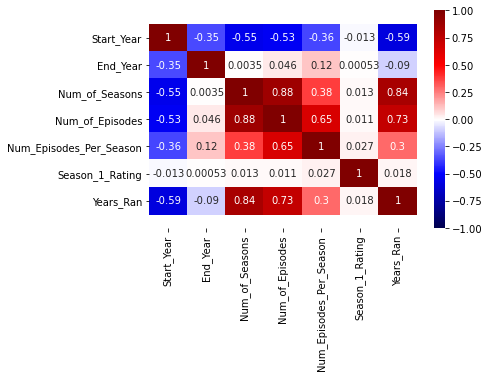

In [45]:
# try a heatmap for the corr matrix
sns.heatmap(tv_show_df2.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

plt.gca().set_ylim(len(tv_show_df2.corr())+0.5, -0.5);  # quick fix to make sure viz isn't cut off


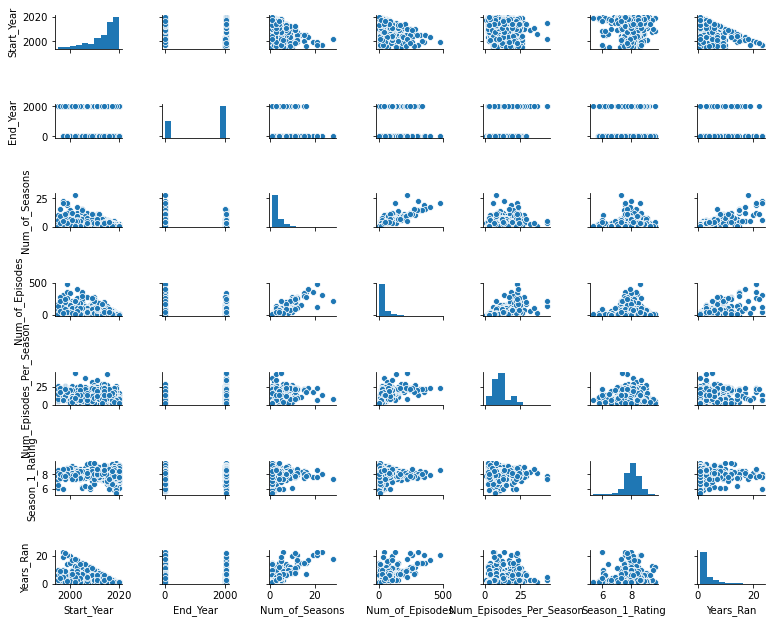

In [46]:
# Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(tv_show_df2, height=1.2, aspect=1.25);

#episodes per season looks way better now!

In [50]:
# Create an empty model
lr2 = LinearRegression()

# Choose just the X1 column for our data
X = tv_show_df2[['Start_Year', 'Num_Episodes_Per_Season', 'Season_1_Rating']]
#X = tv_show_df['Season_1_Rating'].values.reshape(-1,1)

# Choose the response variable
y = tv_show_df2['Num_of_Seasons']

# Fit the model 
lr2.fit(X, y)

LinearRegression()

In [51]:
lr2.score(X, y) #wow the score jumped by .04! neat!

0.34164515619269886

## Next notebook, check when we add all the dummy variables for genre